In [87]:
import os
import re
import shutil
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# EDA

In [88]:
# 이미지 데이터 경로 설정
ng_folder = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG'
ok_folder = r'C:\Users\kimhyunju\Desktop\PCB_classify\OK'

In [89]:
# NG와 OK 파일에서 이미지 파일 개수 확인
ng_images = os.listdir(ng_folder)
ok_images = os.listdir(ok_folder)

ng_count = len(ng_images)
ok_count = len(ok_images)

print(f"NG 이미지 개수: {ng_count}")
print(f"OK 이미지 개수: {ok_count}")

NG 이미지 개수: 1840
OK 이미지 개수: 1298


In [90]:
# 첫 번째 NG 이미지와 첫 번째 OK 이미지 확인
ng_image_path = os.path.join(ng_folder, ng_images[0])
ok_image_path = os.path.join(ok_folder, ok_images[0])

ng_image = Image.open(ng_image_path)
ok_image = Image.open(ok_image_path)

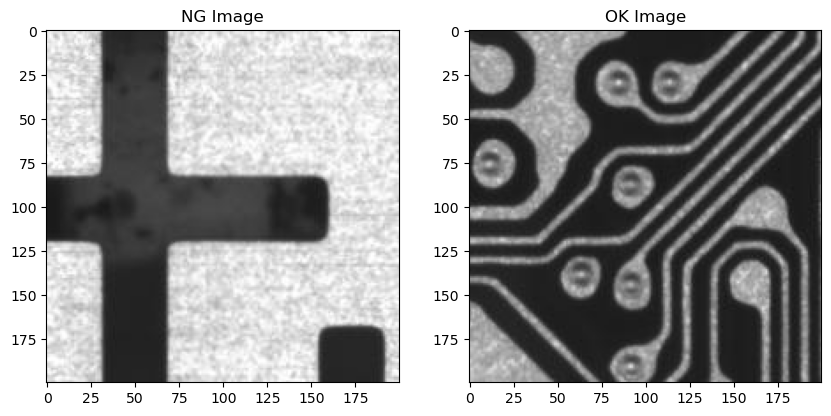

In [91]:
# NG와 OK 이미지 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(ng_image, cmap='gray')
plt.title('NG Image')

plt.subplot(1, 2, 2)
plt.imshow(ok_image, cmap='gray')
plt.title('OK Image')

plt.show()

In [92]:
# 무작위 NG 및 OK 이미지 선택
def show_random_images(ng_images, ok_images, ng_folder, ok_folder):
    ng_image = Image.open(os.path.join(ng_folder, np.random.choice(ng_images)))
    ok_image = Image.open(os.path.join(ok_folder, np.random.choice(ok_images)))

    plt.figure(figsize=(10, 5))
    
    # NG 이미지
    plt.subplot(1, 2, 1)
    plt.imshow(ng_image, cmap='gray')
    plt.title('NG Image')

    # OK 이미지
    plt.subplot(1, 2, 2)
    plt.imshow(ok_image, cmap='gray')
    plt.title('OK Image')

    plt.show()

In [93]:
# 이미지 밝기 히스토그램 분석
def plot_image_histogram(image_path):
    image = Image.open(image_path).convert('L')  # 흑백으로 변환
    image_array = np.array(image)
    
    plt.figure(figsize=(6, 4))
    plt.hist(image_array.ravel(), bins=256, range=(0, 256), color='gray')
    plt.title(f"Histogram of {os.path.basename(image_path)}")
    plt.show()

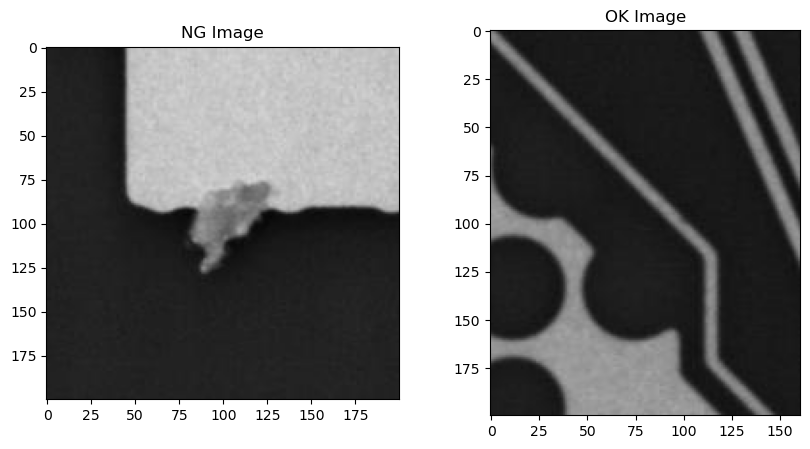

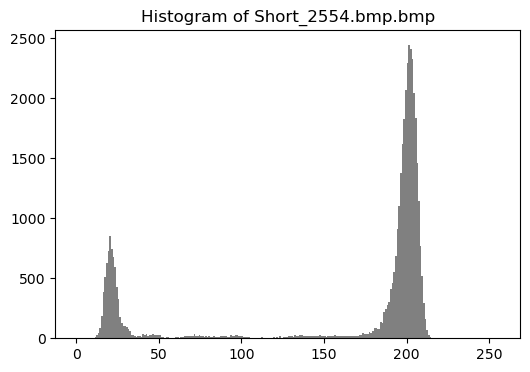

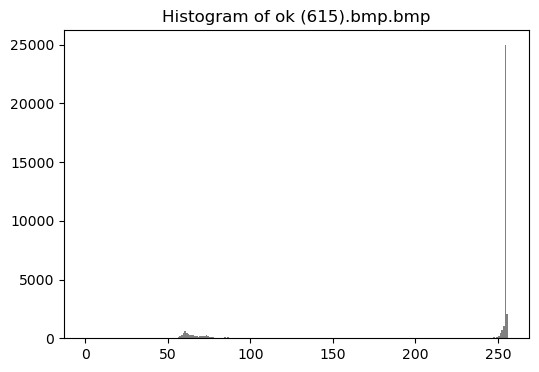

In [94]:
# 무작위 NG, OK 이미지 히스토그램 시각화
show_random_images(ng_images, ok_images, ng_folder, ok_folder)
plot_image_histogram(os.path.join(ng_folder, np.random.choice(ng_images)))
plot_image_histogram(os.path.join(ok_folder, np.random.choice(ok_images)))

# 데이터 전처리

In [100]:
ng_folder = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG'
ng_newlabel_folder = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_newlabel'

os.makedirs(ng_newlabel_folder, exist_ok=True)

label_mappings = {
    'nick_dust': 'nick_dust',
    'dust_nick': 'nick_dust',
    'island': 'island',
    'bichim': 'bichim',
    'chui': 'chui',
    'dust': 'dust',
    'eemool': 'eemool',
    'ivh': 'ivh',
    'lvh': 'ivh',
    'miboo': 'miboosik',
    'miboosik': 'miboosik',
    'milchack': 'milchack',
    'nick': 'nick',
    'nogwang': 'nogwang',
    'open': 'open',
    'pinhole': 'pinhole',
    'pyomyun': 'pyomyun',
    'scratch': 'scratch',
    'short': 'short'
}

def rename_files_in_folder(folder_path, new_folder, label_mappings):
    label_counters = {label: 1 for label in label_mappings.values()}

    for image_file in os.listdir(folder_path):
        original_file_path = os.path.join(folder_path, image_file)

        cleaned_filename = re.sub(r'[()\s]', '', image_file).lower()

        file_name, file_ext = os.path.splitext(cleaned_filename)

        for original_label, new_label in label_mappings.items():
            if original_label.lower() in file_name:
                new_file_name = f"{new_label}_{label_counters[new_label]}{file_ext}"
                new_file_path = os.path.join(new_folder, new_file_name)

                shutil.copy2(original_file_path, new_file_path)
                print(f"파일 복사 및 이름 변경: {image_file} -> {new_file_name}")

                label_counters[new_label] += 1
                break

rename_files_in_folder(ng_folder, ng_newlabel_folder, label_mappings)


파일 복사 및 이름 변경: bichim (1).bmp.bmp -> bichim_1.bmp
파일 복사 및 이름 변경: bichim (2).bmp.bmp -> bichim_2.bmp
파일 복사 및 이름 변경: bichim (3).bmp.bmp -> bichim_3.bmp
파일 복사 및 이름 변경: bichim (4).bmp.bmp -> bichim_4.bmp
파일 복사 및 이름 변경: bichim (5).bmp.bmp -> bichim_5.bmp
파일 복사 및 이름 변경: bichim (6).bmp.bmp -> bichim_6.bmp
파일 복사 및 이름 변경: bichim (7).bmp.bmp -> bichim_7.bmp
파일 복사 및 이름 변경: bichim (8).bmp.bmp -> bichim_8.bmp
파일 복사 및 이름 변경: chui (1).bmp.bmp -> chui_1.bmp
파일 복사 및 이름 변경: chui (2).bmp.bmp -> chui_2.bmp
파일 복사 및 이름 변경: dust (1).bmp.bmp -> dust_1.bmp
파일 복사 및 이름 변경: dust (10).bmp.bmp -> dust_2.bmp
파일 복사 및 이름 변경: dust (100).bmp.bmp -> dust_3.bmp
파일 복사 및 이름 변경: dust (101).bmp.bmp -> dust_4.bmp
파일 복사 및 이름 변경: dust (103).bmp.bmp -> dust_5.bmp
파일 복사 및 이름 변경: dust (105).bmp.bmp -> dust_6.bmp
파일 복사 및 이름 변경: dust (106).bmp.bmp -> dust_7.bmp
파일 복사 및 이름 변경: dust (107).bmp.bmp -> dust_8.bmp
파일 복사 및 이름 변경: dust (11).bmp.bmp -> dust_9.bmp
파일 복사 및 이름 변경: dust (110).bmp.bmp -> dust_10.bmp
파일 복사 및 이름 변경: dust (111).bmp.b

In [101]:
# 라벨 리스트 (길이 순으로 정렬하여 긴 라벨이 먼저 매칭되도록 함)
labels = sorted(['bichim', 'chui', 'dust', 'dust_Nick', 'eemool', 'Island', 'Ivh', 'LVH', 
                 'miboo', 'miboosik', 'milchack', 'nick', 'Nick', 'Nick_Dust', 'nogwang', 
                 'open', 'Open', 'pinhole', 'pyomyun', 'scratch', 'Scratch', 'short', 'Short'], 
                key=len, reverse=True)

# 라벨별로 파일 개수를 저장할 딕셔너리
label_count = defaultdict(int)

# NG 폴더 내 이미지 파일들을 반복하면서 라벨 확인
for image_file in os.listdir(ng_newlabel_folder):
    # 파일 이름에서 괄호, 공백 등을 제거하여 라벨 매칭을 좀 더 유연하게 처리
    cleaned_filename = re.sub(r'[()\s]', '', image_file)  # 공백, 괄호 등을 제거

    found = False
    for label in labels:
        # 파일 이름에 포함된 라벨 확인
        if label.lower() in cleaned_filename.lower():
            label_count[label] += 1
            found = True
            break
    
    if not found:
        print(f"라벨이 매칭되지 않은 파일: {image_file}")

for label, count in label_count.items():
    print(f"{label}: {count}개의 이미지 파일")

unlabeled_count = len(os.listdir(ng_folder)) - sum(label_count.values())
print(f"라벨이 없는 이미지 파일: {unlabeled_count}개")

bichim: 8개의 이미지 파일
chui: 2개의 이미지 파일
dust: 402개의 이미지 파일
eemool: 314개의 이미지 파일
Island: 5개의 이미지 파일
Ivh: 36개의 이미지 파일
miboosik: 300개의 이미지 파일
milchack: 13개의 이미지 파일
nick: 300개의 이미지 파일
Nick_Dust: 103개의 이미지 파일
nogwang: 2개의 이미지 파일
open: 78개의 이미지 파일
pinhole: 11개의 이미지 파일
pyomyun: 3개의 이미지 파일
scratch: 36개의 이미지 파일
short: 227개의 이미지 파일
라벨이 없는 이미지 파일: 0개


In [102]:
# 이미지 크기 확인 함수
def check_image_sizes(folder_path):
    image_sizes = []
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            with Image.open(image_path) as img:
                image_sizes.append(img.size)  # (width, height) 형태로 이미지 크기 저장
        except Exception as e:
            print(f"Error opening {image_file}: {e}")

    # 고유한 이미지 크기 출력
    unique_sizes = set(image_sizes)
    print(f"폴더 '{folder_path}'의 고유한 이미지 크기: {unique_sizes}")
    
    if len(unique_sizes) == 1:
        print(f"모든 이미지의 크기가 동일합니다: {unique_sizes.pop()}")
    else:
        print(f"서로 다른 크기의 이미지가 있습니다. 고유 크기 목록: {unique_sizes}")


In [103]:
# NG 폴더와 OK 폴더의 이미지 크기 확인
print("NG 이미지 크기 확인:")
check_image_sizes(ng_newlabel_folder)

print("\nOK 이미지 크기 확인:")
check_image_sizes(ok_folder)

NG 이미지 크기 확인:
폴더 'C:\Users\kimhyunju\Desktop\PCB_classify\NG_newlabel'의 고유한 이미지 크기: {(159, 200), (200, 172), (199, 200), (200, 165), (183, 200), (200, 200), (178, 200), (161, 200), (174, 200), (199, 199), (200, 180), (200, 199), (200, 154), (200, 189), (200, 179), (200, 185)}
서로 다른 크기의 이미지가 있습니다. 고유 크기 목록: {(159, 200), (200, 172), (199, 200), (200, 165), (183, 200), (200, 200), (178, 200), (161, 200), (174, 200), (199, 199), (200, 180), (200, 199), (200, 154), (200, 189), (200, 179), (200, 185)}

OK 이미지 크기 확인:
폴더 'C:\Users\kimhyunju\Desktop\PCB_classify\OK'의 고유한 이미지 크기: {(200, 194), (166, 200), (199, 200), (194, 200), (178, 200), (200, 200), (195, 200), (168, 200), (161, 200), (199, 199), (200, 193), (200, 199), (200, 169)}
서로 다른 크기의 이미지가 있습니다. 고유 크기 목록: {(200, 194), (166, 200), (199, 200), (194, 200), (178, 200), (200, 200), (195, 200), (168, 200), (161, 200), (199, 199), (200, 193), (200, 199), (200, 169)}


In [104]:
# 결과를 저장할 폴더 경로 설정
ng_nl_resized_folder = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_nl_resized'
ok_resized_folder = r'C:\Users\kimhyunju\Desktop\PCB_classify\OK_resized'

# 저장할 폴더가 없으면 생성
os.makedirs(ng_nl_resized_folder, exist_ok=True)
os.makedirs(ok_resized_folder, exist_ok=True)

# 이미지 크기 변경 함수
def resize_images(input_folder, output_folder, target_size=(200, 200)):
    for image_file in os.listdir(input_folder):
        image_path = os.path.join(input_folder, image_file)
        output_path = os.path.join(output_folder, image_file)
        
        try:
            with Image.open(image_path) as img:
                # 이미지 크기를 (200, 200)으로 변경
                resized_img = img.resize(target_size)
                
                # 변경된 이미지를 새로운 폴더에 저장
                resized_img.save(output_path)
                
                print(f"이미지 {image_file}이(가) {target_size} 크기로 저장되었습니다.")
        
        except Exception as e:
            print(f"Error processing {image_file}: {e}")

# NG_newlabel 이미지 크기 변경 및 저장
print("NG_newlabel 이미지 크기 변경 중...")
resize_images(ng_newlabel_folder, ng_nl_resized_folder)

# OK 이미지 크기 변경 및 저장
print("OK 이미지 크기 변경 중...")
resize_images(ok_folder, ok_resized_folder)

print("모든 이미지 크기 변경이 완료되었습니다.")

NG_newlabel 이미지 크기 변경 중...
이미지 bichim_1.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 bichim_2.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 bichim_3.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 bichim_4.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 bichim_5.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 bichim_6.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 bichim_7.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 bichim_8.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 chui_1.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 chui_2.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 dust_1.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 dust_10.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 dust_100.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 dust_101.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 dust_102.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 dust_103.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 dust_104.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 dust_105.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 dust_106.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 dust_107.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 dust_108.bmp이(가) (200, 200) 크기로 저장되었습니다.
이미지 dust_109.bmp이(가) (200, 200) 크기로

# PCB 결함 검출 모델

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 이미지 변환: 이미지를 텐서로 변환하고 정규화
data_transforms = transforms.Compose([
    transforms.Resize((200, 200)),  # 이미지 크기 조정
    transforms.ToTensor(),  # 이미지를 Tensor로 변환
    transforms.Normalize([0.5], [0.5])  # 픽셀 값을 [-1, 1] 범위로 정규화
])

# 데이터 디렉토리 설정
data_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify'

# 데이터셋 생성 (ImageFolder는 폴더 구조를 보고 자동으로 라벨링)
train_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 라벨 확인 (NG: 1, OK: 0)
print(train_dataset.class_to_idx)  # {'NG': 1, 'OK': 0}과 같이 출력

# 데이터셋 및 배치 확인
for inputs, labels in train_loader:
    print(f"입력 데이터 크기: {inputs.shape}")  # (batch_size, channels, height, width)
    print(f"레이블: {labels}")
    break  # 첫 번째 배치만 출력